# KNN implemented from scratch


## Introduction
This program makes use of the **Breast Cancer Wisconsin (Diagnostic) dataset** and use **KNN** to predict breast cancer in the test dataset. The total **accuracy rate** is also calculated, with **graphics** displayed to show the accuracy of KNN algorithm

## Main features
-  data preprocessing: **data normalization**, **crucial features** are found out to help predict more accurately
-  Different variations are tried, such as:
  1.  different **values of k**
  2.  **weighted voting** of nearest neighbors
  3.  data **split in different ways**
  4. **Filter out** the neighbors that are too far away
  5. **elminate** the case where two qually-weighted predictions are present


In [16]:
#Author: CHEN CHENG; Date: 2018/02/06
#import the csv file, read it and print some information to check the content
import csv
with open('wisc_bc_data.csv', 'r') as csvfile:
    lines = csv.reader(csvfile)
    data=list(lines)

#get rid of the first line， which contains the names of attributes
del data[0]

#change the attribute data into floating numbers, for furture processing
for i in range(0,569):
    for j in range(2,32):
        data[i][j]=float(data[i][j])

#print out some information to verify the correctness
print("the first 3 lines of data:\n",data[:3])
print('\nnumber of cols:',len(data[0]))
            

the first 3 lines of data:
 [['87139402', 'B', 12.32, 12.39, 78.85, 464.1, 0.1028, 0.06981, 0.03987, 0.037, 0.1959, 0.05955, 0.236, 0.6656, 1.67, 17.43, 0.008045, 0.0118, 0.01683, 0.01241, 0.01924, 0.002248, 13.5, 15.64, 86.97, 549.1, 0.1385, 0.1266, 0.1242, 0.09391, 0.2827, 0.06771], ['8910251', 'B', 10.6, 18.95, 69.28, 346.4, 0.09688, 0.1147, 0.06387, 0.02642, 0.1922, 0.06491, 0.4505, 1.197, 3.43, 27.1, 0.00747, 0.03581, 0.03354, 0.01365, 0.03504, 0.003318, 11.88, 22.94, 78.28, 424.8, 0.1213, 0.2515, 0.1916, 0.07926, 0.294, 0.07587], ['905520', 'B', 11.04, 16.83, 70.92, 373.2, 0.1077, 0.07804, 0.03046, 0.0248, 0.1714, 0.0634, 0.1967, 1.387, 1.342, 13.54, 0.005158, 0.009355, 0.01056, 0.007483, 0.01718, 0.002198, 12.41, 26.44, 79.93, 471.4, 0.1369, 0.1482, 0.1067, 0.07431, 0.2998, 0.07881]]

number of cols: 32


## preprocessing of data

-  calculate the means of all the attributes, divided according to the type
-  normalize the data

In [17]:
#inspect the data to get some insights

#B_set contains all the data that are of result 'B', M_set contains all the data with result 'M'
B_set = []
M_set = []
for i in range(len(data)):
    if (data[i][1]=='B'):
        B_set.append(data[i])
    else:
        M_set.append(data[i])
print("size of B_set:",len(B_set))
print("size of M_set:",len(M_set))

#get the mean values for all attributes corresponding to different classes
#at the same time get the minimum and maximum for each attribute
#for the ease of data normalization

means = []
minimums = []
maximums = []

#initialize the means to all zeros, minimums to all 10000.0 and maximums to all zeros
for i in range(0,30):
    means.append([0,0])
    minimums.append(10000.0)
    maximums.append(0.0)

#calculate the sums for all attributes, seperated into different result groups
#at the same time, find out all the minimum and maximum values
for i in range(len(B_set)):
    for j in range(0,30):
        means[j][0]+=B_set[i][j+2]
        if B_set[i][j+2] < minimums[j]:
            minimums[j] = B_set[i][j+2]
        elif B_set[i][j+2] > maximums[j]:
            maximums[j] = B_set[i][j+2]

for i in range(len(M_set)):
    for j in range(0,30):
        means[j][1]+=M_set[i][j+2]
        if M_set[i][j+2] < minimums[j]:
            minimums[j] = M_set[i][j+2]
        elif M_set[i][j+2] > maximums[j]:
            maximums[j] = M_set[i][j+2]

#get the set of crutial indices
index_set = []
for i in range(0,30):
    #get the mean value by sum/size
    means[i][0] = means[i][0]/len(B_set)
    means[i][1] = means[i][1]/len(M_set)
    if (means[i][1]>2*means[i][0]):
        index_set.append(i+2)

print("\ncrutial indices:\n",index_set)

#normalize the data
for i in range(len(data)):
    for j in range(2,32):
        data[i][j] = (data[i][j] - minimums[j-2])/(maximums[j-2]-minimums[j-2])

print("\nFirst few lines of normalized data:\n",data[:2])


size of B_set: 357
size of M_set: 212

crutial indices:
 [5, 8, 9, 12, 14, 15, 25, 27, 28, 29]

First few lines of normalized data:
 [['87139402', 'B', 0.2526858819631786, 0.09063239770037199, 0.24227765876580742, 0.13599151643690352, 0.4529204658300985, 0.15468376173240905, 0.09341611996251172, 0.18389662027833, 0.45404040404040397, 0.2019797809604044, 0.04508419337316675, 0.06749469589816123, 0.04301936578240588, 0.01985065315895838, 0.21524968555597102, 0.07170967645026587, 0.0425, 0.23508240197007008, 0.15981876512635784, 0.04675041112170585, 0.19815012451085023, 0.09648187633262263, 0.18208078091538424, 0.08943668895005899, 0.4446278808690485, 0.09635105897876221, 0.09920127795527157, 0.3227147766323024, 0.24876798738419084, 0.0831037649219468], ['8910251', 'B', 0.17128117752851532, 0.3124788637132228, 0.17614539423674935, 0.08606574761399786, 0.3994763925250519, 0.2923747009385927, 0.14964854732895969, 0.1313121272365805, 0.4353535353535354, 0.3148694187026116, 0.1227593699076588

## function to split the data into training_data and testing_data

1. splitData_simple simply choose the first 469 data as training_data, the last 100 data as testing_data
2. splitData_random split the data randomly according to the spliting rate specified

In [18]:
#two different ways to split the data
import random

def splitData_simple(training_data = [], testing_data = []):
    for i in range(0,469):
        training_data.append(data[i])
    for i in range(469,len(data)):
        testing_data.append(data[i])
    
def splitData_random(split, training_data = [], testing_data = []):
    for i in range(len(data)):
        if random.random() < split:
            training_data.append(data[i])
        else:
            testing_data.append(data[i])
    

## Two ways to find the distance

The first one uses all attributes, the second one only uses crutial attributes

In [19]:
#define the distance between points, which inspects all the attributes
import math
def Dist(instance1, instance2):
    distance = 0
    for x in range(2,32):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

#define the distance between points, which only inspects the crutial attributes
def DistCrutial(instance1, instance2):
    distance = 0
    for x in index_set:
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


## Three ways to get neighbors

1. getNeighbors simply get all the neighbors according to all attributes
2. getNeighborsCrutial get neighbors according to crutial attributes
3. getFilteredNeighbors filtered out all neighbors that are too far away

In [20]:
#use the ordinary Dist function to get neighbors
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	for x in range(len(trainingSet)):
		dist = Dist(testInstance, trainingSet[x])
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

#use DistCrutial function the get neighbors
def getNeighborsCrutial(trainingSet, testInstance, k):
	distances = []
	for x in range(len(trainingSet)):
		dist = DistCrutial(testInstance, trainingSet[x])
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors  

#a different way to do the voting: filter out those that are too far away
def getFilteredNeighbors(trainingSet, testInstance, k):
	threshold = 5
	distances = []
	for x in range(len(trainingSet)):
		dist = Dist(testInstance, trainingSet[x])
		if dist>threshold:
			print("One neighbor is ignored!")
			continue
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

## Three ways to get response

1. getResponse simply returns all the voted according to neighbors
2. getWeightedResponse puts more weight on the near neighbors, less on the far neighbors
3. getClearResponse eliminates all the cases where an instance has 2 equally-weighted votes

In [21]:
#define the function to get the response from neighbors
#this is predicted by simple addition of votes, no weights are considered
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

#now we consider a different way to do the voting: add weights to votes according to its distance
def getWeightedResponse(neighbors):
	classVotes = {}
	voting_power=len(neighbors)
	for x in range(len(neighbors)):
		response = neighbors[x][1]
		if response in classVotes:
			classVotes[response] += voting_power
		else:
			classVotes[response] = voting_power
		voting_power=voting_power-1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

#when we get the response, there may be two neigbors that are equivalently good.
#we may consider reducing k in this case to get a clear winner
def getClearResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	if (len(sortedVotes)>1 and sortedVotes[0][1]==sortedVotes[1][1]):
		return None    
	return sortedVotes[0][0]

## Given the testSet and predictions, get the accuracy rate

In [22]:
#test the accuracy of the prediction scheme
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

## Main part 1

we use the simple method to split the data and try 2 different ways of consideration of indices

If we split the data using the trivial method:

Size of training data: 469
Size of testing data: 100
if we consider all indices:

Accuracy when k= 1 -> 96.0%
Accuracy when k= 4 -> 97.0%
Accuracy when k= 7 -> 96.0%
Accuracy when k= 10 -> 97.0%
Accuracy when k= 13 -> 97.0%
Accuracy when k= 15 -> 97.0%

if we only consider crutial indices:

Accuracy when k= 1 -> 93.0%
Accuracy when k= 4 -> 92.0%
Accuracy when k= 7 -> 92.0%
Accuracy when k= 10 -> 91.0%
Accuracy when k= 13 -> 91.0%
Accuracy when k= 15 -> 92.0%


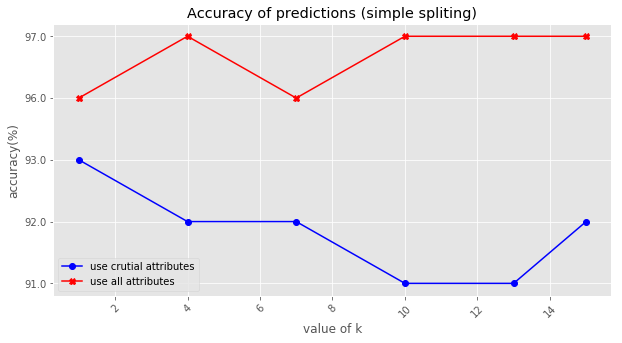

In [23]:
#main part to get the result
#we use the simple method to split the data and try 2 different ways of consideration of indices
import matplotlib.pyplot as plt

%matplotlib inline

print("If we split the data using the trivial method:\n")

#get the sets of training data and testing data
training_data = []
testing_data = []
splitData_simple(training_data,testing_data)
print("Size of training data:",len(training_data))
print("Size of testing data:",len(testing_data))

#prepare the two accuracy sets
accuracies1 = []
accuracies2 = []
k_values = [1,4,7,10,13,15]
print("if we consider all indices:\n")

#get the result if we consider all attributes, store the accuracy results in accuracies1

#consider all the values for k in the k_values set
for k in k_values:
	predictions=[]
	#for each testing data, get the prediction result
	for x in range(len(testing_data)):
		neighbors = getNeighbors(training_data, testing_data[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testing_data[x][1]))
	#comparing all the predictions against the ground truth, we get the accuracy rate
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%')
	accuracies1.append(repr(accuracy))

print("\nif we only consider crutial indices:\n")

#get the result if we only consider crutial attributes, store the accuracy results in accuracies2
for k in k_values:
	predictions=[]
	for x in range(len(testing_data)):
		neighbors = getNeighborsCrutial(training_data, testing_data[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testing_data[x][1]))
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%')
	accuracies2.append(repr(accuracy))

#plot the result
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("Accuracy of predictions (simple spliting)")
plt.xlabel("value of k")
plt.xticks(rotation=45)
plt.ylabel("accuracy(%)")
plt.plot(k_values,accuracies2,color='b',label="use crutial attributes",marker="o")
plt.plot(k_values,accuracies1,color="r",label="use all attributes",marker="X")
plt.legend()
plt.grid(True)


## Main part 2

Now we switch to the randomized way of spliting

If we split the data using the randomized method:

Size of training data: 455
Size of testing data: 114
if we consider all indices:

Accuracy when k= 1 -> 100.0%
Accuracy when k= 4 -> 98.24561403508771%
Accuracy when k= 7 -> 97.36842105263158%
Accuracy when k= 10 -> 98.24561403508771%
Accuracy when k= 13 -> 97.36842105263158%
Accuracy when k= 15 -> 96.49122807017544%

if we only consider crutial indices:

Accuracy when k= 1 -> 93.85964912280701%
Accuracy when k= 4 -> 92.98245614035088%
Accuracy when k= 7 -> 92.10526315789474%
Accuracy when k= 10 -> 91.22807017543859%
Accuracy when k= 13 -> 92.10526315789474%
Accuracy when k= 15 -> 92.10526315789474%


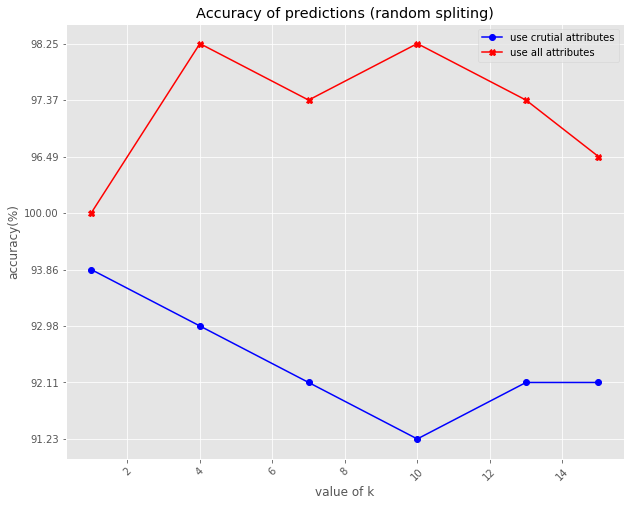

In [25]:
#we now use the randomized way to split the data, also try different ways of consideration of indices
import matplotlib.pyplot as plt

%matplotlib inline

print("If we split the data using the randomized method:\n")

#we use a randomized way to split the data, with splitting rate = 469/569
#which is consistent with the simple splitting method
training_data = []
testing_data = []
splitData_random(469/569,training_data,testing_data)
print("Size of training data:",len(training_data))
print("Size of testing data:",len(testing_data))

accuracies1 = []
accuracies2 = []
k_values = [1,4,7,10,13,15]
print("if we consider all indices:\n")

for k in k_values:
	predictions=[]
	for x in range(len(testing_data)):
		neighbors = getNeighbors(training_data, testing_data[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testing_data[x][1]))
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%')
	accuracies1.append("{0:.2f}".format(accuracy))

print("\nif we only consider crutial indices:\n")


for k in k_values:
	predictions=[]
	for x in range(len(testing_data)):
		neighbors = getNeighborsCrutial(training_data, testing_data[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testing_data[x][1]))
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%')
	accuracies2.append("{0:.2f}".format(accuracy))

plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.title("Accuracy of predictions (random spliting)")
#plt.ylim((90,100))
plt.xlabel("value of k")
plt.xticks(rotation=45)
plt.ylabel("accuracy(%)")
plt.plot(k_values,accuracies2,color='b',label="use crutial attributes",marker="o")
plt.plot(k_values,accuracies1,color="r",label="use all attributes",marker="X")
plt.legend()
plt.grid(True)


## Main part 3

Get weighted predictions

Size of training data: 469
Size of testing data: 100
Accuracy when k= 1 -> 96.0%
Accuracy when k= 4 -> 97.0%
Accuracy when k= 7 -> 98.0%
Accuracy when k= 10 -> 97.0%
Accuracy when k= 13 -> 97.0%
Accuracy when k= 15 -> 97.0%


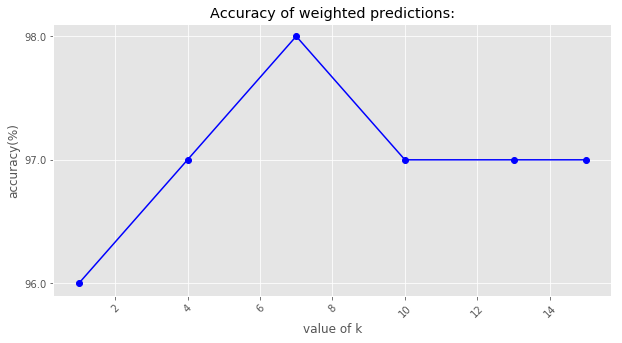

In [26]:
#main part to get the result, with voting weighted
accuracies = []
k_values = [1,4,7,10,13,15]

training_data = []
testing_data = []
splitData_simple(training_data,testing_data)
print("Size of training data:",len(training_data))
print("Size of testing data:",len(testing_data))

for k in k_values:
	predictions=[]
	for x in range(len(testing_data)):
		neighbors = getNeighbors(training_data, testing_data[x], k)
		result = getWeightedResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testing_data[x][1]))
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%')
	accuracies.append(repr(accuracy))
    
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("Accuracy of weighted predictions:")
plt.xlabel("value of k")
plt.xticks(rotation=45)
plt.ylabel("accuracy(%)")
plt.plot(k_values,accuracies,color='b',marker="o")
plt.legend()
plt.grid(True)


## Main part 4

filtering of neighbors enabled

Size of training data: 469
Size of testing data: 100
Accuracy when k= 1 -> 96.0%

Accuracy when k= 4 -> 97.0%

Accuracy when k= 7 -> 96.0%

Accuracy when k= 10 -> 97.0%

Accuracy when k= 13 -> 97.0%

Accuracy when k= 15 -> 97.0%



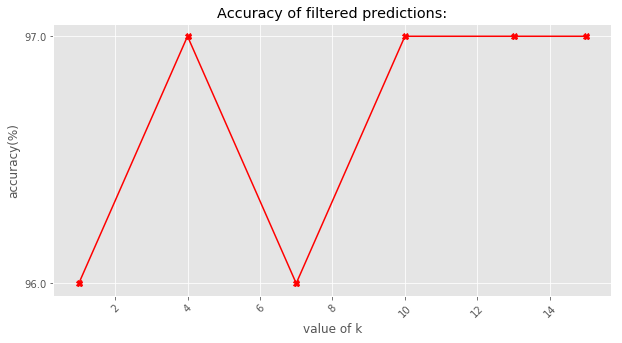

In [27]:
#main part to get the result, with filtering enabled
#as we already filtered the neighbors, we will just stick to consider all attributes:
accuracies1 = []
k_values = [1,4,7,10,13,15]

training_data = []
testing_data = []
splitData_simple(training_data,testing_data)
print("Size of training data:",len(training_data))
print("Size of testing data:",len(testing_data))

for k in k_values:
	predictions=[]
	for x in range(len(testing_data)):
		neighbors = getFilteredNeighbors(training_data, testing_data[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testing_data[x][1]))
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%\n')
	accuracies1.append(repr(accuracy))


plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("Accuracy of filtered predictions:")
plt.xlabel("value of k")
plt.xticks(rotation=45)
plt.ylabel("accuracy(%)")
plt.plot(k_values,accuracies1,color="r",marker="X")
plt.legend()
plt.grid(True)

## Main part 5

filter out those unclear predictions

Accuracy when k= 1 -> 96.0%

Accuracy when k= 4 -> 98.0%

Accuracy when k= 7 -> 96.0%

Accuracy when k= 10 -> 97.0%

Accuracy when k= 13 -> 97.0%

Accuracy when k= 15 -> 97.0%



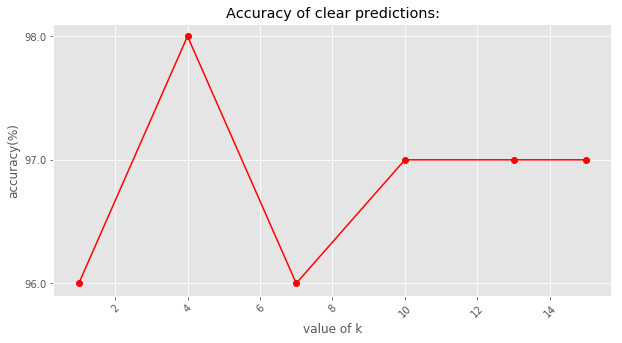

In [28]:
#main part to get the result, with all the uncertain predictions thrown away

accuracies1 = []
k_values = [1,4,7,10,13,15]

for k in k_values:
	predictions=[]
	for x in range(len(testing_data)):
		neighbors = getNeighbors(training_data, testing_data[x], k)
		result = getClearResponse(neighbors)
		if (result==None):
			predictions.append(testing_data[x][1])
			continue
		predictions.append(result)
	accuracy = getAccuracy(testing_data, predictions)
	print('Accuracy when k=',k,'-> ' + repr(accuracy) + '%\n')
	accuracies1.append(repr(accuracy))

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("Accuracy of clear predictions:")
plt.xlabel("value of k")
plt.xticks(rotation=45)
plt.ylabel("accuracy(%)")
plt.plot(k_values,accuracies1,color="r",marker="o")
plt.legend()
plt.grid(True)


## Conclusion

1. when we use the simple splitting method, it's better to consider all the arributes, the accuracy is 96~97
2. when we use the randomized splitting method, the accuracy can be greater than 98
3. when we use the weighted predictions, the accuracy gets its maximum at 98, when k=7
4. when we filter out all the far neighbors, the accuracy is 96~97
5. when we filter out all the unclear votes, the accuracy gets its maximum at 98, when k=4
6. **All in all, when we use a randomized splitting method and look at all its attributes, accuracy can be very high, but the performance is not very deterministic, in the sense that results depends on the splitting result; the different variations don't help very much; it's generally better to just simply consider all attributes**